# Kaggle's Ames, Iowa Housing Price Prediction Competition
<img src="https://www.google.com/maps/vt/data=oB8Tb0gei8HfbQIBRCjvw1eqwuC44XkfKGVSHeuezXrRCQvG7IzXc4wPxEOfUvrC-5i-g0okQtO9GBvEmQLva1MK7HHQyMJfcVp0nYPvE0Hzq8NL4lPotvNDaBGaLEYEELkAoSoRNvK1m6di5JpYbXqcp8WL3TUdel0FxONuSS4bbeAYBHaTgeqtGj2dnRV0SV0JX_xwqedPbjUoJFnP0p4GCpSrDLVrkvySsmK7jHug4UyIAJIZERloDsEq1ozjpLYX7A1s6lmdo0wwWB-z5qfbWevXmYghtym81g">
-Michael Cascio

## Goal:
The goal of this competition was to predict the prices of homes in Ames, Iowa based on a dataset containing 1,460 houses with 79 feature variables describing each house. Personally, my goal was to apply as much of what I learned from [Kaggle's Micro Course on Machine Learning](https://www.kaggle.com/learn/machine-learning) as possible, including data processing methods like one hot encoding of categorial variables and cross validating models to prevent overfitting and get the most out of training with smaller datasets. The dataset used in this competition was provided by Dean De Cock for use in data science education. More information about the competition can be found here: https://www.kaggle.com/c/home-data-for-ml-course.<br>
<br>
For this competition, I used the XGBoost gradient boosting library and implemented the XGBRegressor algorithm specifically. XGBoost documentation can be found here: https://xgboost.readthedocs.io/en/latest/ 

### Importing Required Packages:

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

### Load Testing & Training Datasets :

In [127]:
iowa_file_path = 'data/train.csv'
iowa_data = pd.read_csv(iowa_file_path)

test_data_path = 'data/test.csv'
test_data = pd.read_csv(test_data_path)

### Exploratory Data Analysis:

Kaggle data description: https://www.kaggle.com/c/home-data-for-ml-course/data. 

#### Target (Dependent Variable):
It is clear from the competition's prompt that the "SalePrice" feature is the target (dependent variable). Intuitively, this feature describes how much each house was previously sold for. Average home sale price for the entire training set and individual home sale price for the first five homes are shown below:

In [128]:
y = iowa_data.SalePrice
print(f'Average Home Sale Price {y.mean():.2f}')
print(f'Maximum Home Sale Price {y.max():.2f}')
print(f'Minimum Home Sale Price {y.min():.2f}')
print('Sample Home Sale Prices:')
print(y[:5])

Average Home Sale Price 180921.20
Maximum Home Sale Price 755000.00
Minimum Home Sale Price 34900.00
Sample Home Sale Prices:
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


#### Features (Independent Variables):
Shown below are the features and associated datatypes in the Ames, Iowa housing dataset and a sample of the first five homes. Some columns contain numerical variables (int64 & float64 dtypes) while others contain categorical variables (object dytpes).

In [129]:
X = iowa_data.drop("SalePrice", axis=1)
for i in X.columns:
    print(f'[{i},{X[i].dtypes}], ', end="")
X.head(5)

[Id,int64], [MSSubClass,int64], [MSZoning,object], [LotFrontage,float64], [LotArea,int64], [Street,object], [Alley,object], [LotShape,object], [LandContour,object], [Utilities,object], [LotConfig,object], [LandSlope,object], [Neighborhood,object], [Condition1,object], [Condition2,object], [BldgType,object], [HouseStyle,object], [OverallQual,int64], [OverallCond,int64], [YearBuilt,int64], [YearRemodAdd,int64], [RoofStyle,object], [RoofMatl,object], [Exterior1st,object], [Exterior2nd,object], [MasVnrType,object], [MasVnrArea,float64], [ExterQual,object], [ExterCond,object], [Foundation,object], [BsmtQual,object], [BsmtCond,object], [BsmtExposure,object], [BsmtFinType1,object], [BsmtFinSF1,int64], [BsmtFinType2,object], [BsmtFinSF2,int64], [BsmtUnfSF,int64], [TotalBsmtSF,int64], [Heating,object], [HeatingQC,object], [CentralAir,object], [Electrical,object], [1stFlrSF,int64], [2ndFlrSF,int64], [LowQualFinSF,int64], [GrLivArea,int64], [BsmtFullBath,int64], [BsmtHalfBath,int64], [FullBath,in

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


The sample above shows that not all homes have the same features. When a numerical feature = 0 or a categorical feature = NaN the feature does not exist for that home. An investigation of the MiscFeature column's unique values shows some citizens of Ames, Iowa have sheds and second garages. Shown below are the different MiscFeature values in the dataset and the average value ($) for that miscelleneous feature.

In [130]:
X.MiscFeature.unique()
print(X.groupby('MiscFeature')['MiscFeature'].count(), end="\n\n")
print(X.groupby('MiscFeature')['MiscVal'].mean().round(decimals=2))

MiscFeature
Gar2     2
Othr     2
Shed    49
TenC     1
Name: MiscFeature, dtype: int64

MiscFeature
Gar2    11900.00
Othr     1750.00
Shed      697.84
TenC     2000.00
Name: MiscVal, dtype: float64


The code below shows that the average sale price of homes with tennis courts surpassed the total average sale price of all of the homes in the entire dataset. Having a home with a shed or some sort of other decorative or utility feature seems to correlate with a sale price that is lower than the average.

In [131]:
hasMiscFeature = pd.concat([X.MiscFeature, y], axis=1).dropna(axis=0)
print(hasMiscFeature.groupby('MiscFeature')['SalePrice'].mean().round(decimals=2), end="\n\n")
print(f'Average Home Sale Price {y.mean():.2f}')

MiscFeature
Gar2    170750.00
Othr     94000.00
Shed    151187.61
TenC    250000.00
Name: SalePrice, dtype: float64

Average Home Sale Price 180921.20


#### Square Footage vs Sale Price Visual Comparisons
The plots below show the relationship between select area measurement features and sale price. Loosely, sale price appears to increases with square footage increase. There are, however, some outliers. For example, the lot area vs sale price graph shows some homes with lot areas greatly exceeding the average square footage but priced lower than average home. The lot frontage length vs sale price graph also shows outliers with more than 150 feet of street-adjacent property but relatively average price homes. It is also interesting to observe that having a second floor does not always result in a higher priced home, although the top three highest price homes do have a second floor. 

Max Home Sale Price: SalePrice    755000
dtype: int64
Max Home Lot Area: 215245


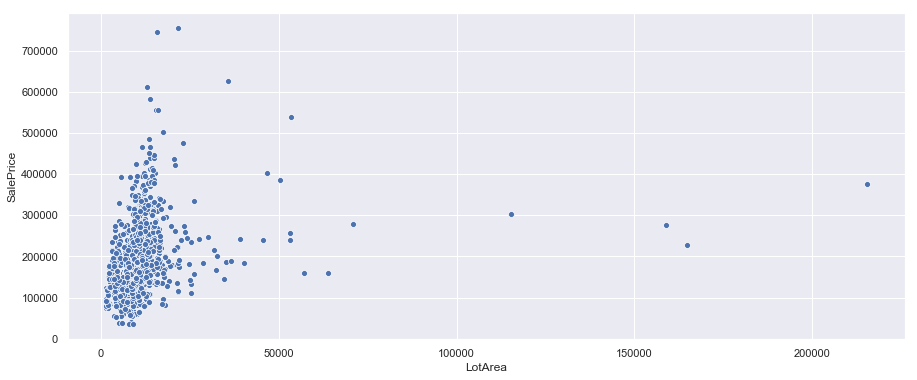

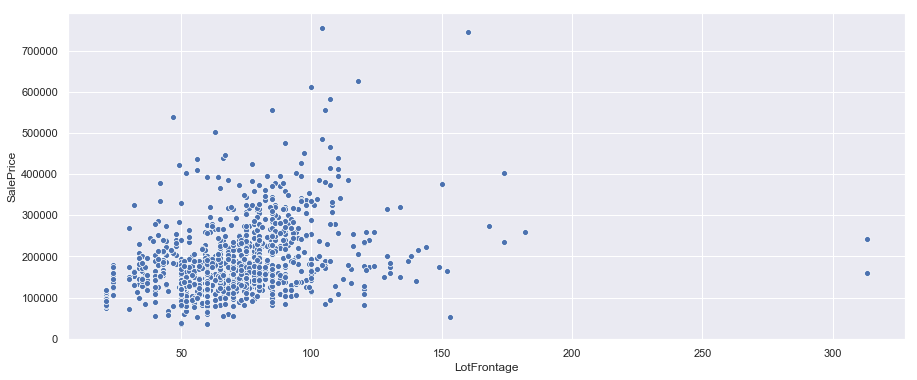

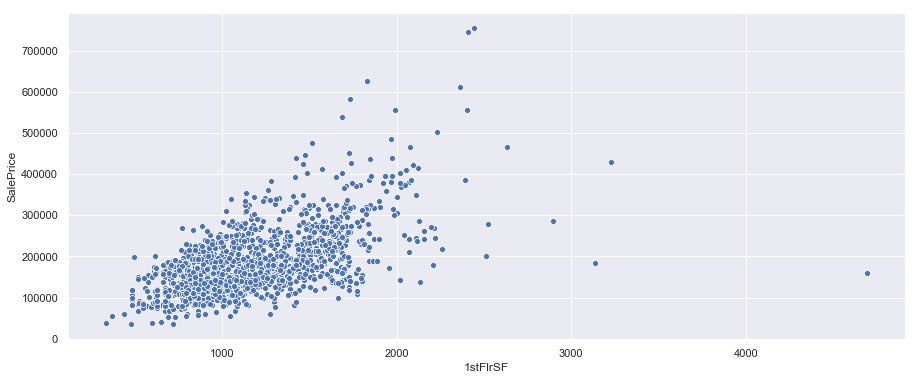

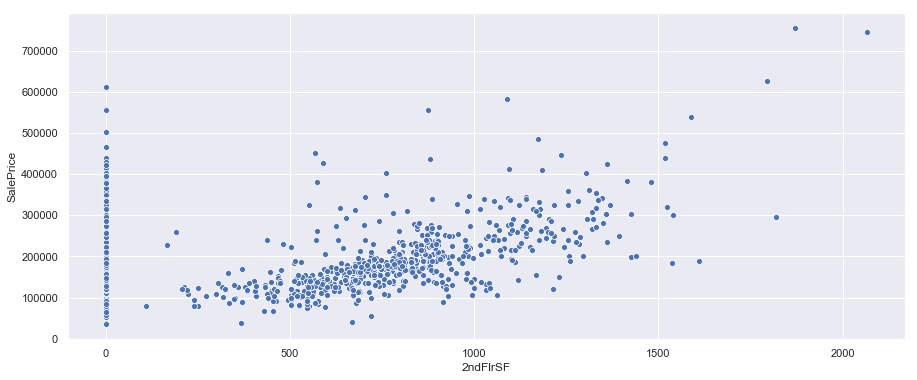

In [132]:
SalePrice = pd.DataFrame(iowa_data.SalePrice)
LotArea = iowa_data.LotArea
LotFrontage = iowa_data.LotFrontage
firstFlrSF = pd.DataFrame(iowa_data["1stFlrSF"])
secondFlrSF = pd.DataFrame(iowa_data["2ndFlrSF"])

print(f'Max Home Sale Price: {SalePrice.max()}')
print(f'Max Home Lot Area: {LotArea.max()}')
data = pd.concat([SalePrice, LotArea], axis=1)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x="LotArea", y="SalePrice", data=data)

data = pd.concat([SalePrice, LotFrontage], axis=1)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x="LotFrontage", y="SalePrice", data=data)

data = pd.concat([SalePrice, firstFlrSF], axis=1)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=data)

data = pd.concat([SalePrice, secondFlrSF], axis=1)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x="2ndFlrSF", y="SalePrice", data=data)

### Data Pre-Processing

#### Training Dataset Encoding

Categorical data will be one hot encoded using Panda's get_dummies() to be considered by the XGBoost algorithm. One hot encoding takes a column of categorical variables and transforms it into a series of columns with each new column name equal to each unique categorical variable and the value in each row equal to 1 if that row has that unique categorical variable. Shown below as an example, the "SaleCondition" column is transformed into a series of columns representing each sale condition: "_Abnorml, _AdjLand, _Alloca, _Family, _Normal, _Partial, _nan". You can also see how the DataFrame shape changes after one hot encoding.

In [133]:
encoded_X = pd.get_dummies(X, dummy_na=True)
print(f'{X.shape[:]} -> {encoded_X.shape[:]}')
encoded_X.head(5)

(1460, 80) -> (1460, 332)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,1,0,0,0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,1,0,1,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,0,1,0,0


#### Testing Dataset Encoding

The testing dataset will similarly need to be one hot encoded. Investigation after encoding reveals that the new testing dataset is not the same size as the encoded training dataset.

In [139]:
test_X = pd.DataFrame(test_data)
encoded_test_X = pd.get_dummies(test_data, dummy_na=True)
print(f'{test_X.shape[:]} -> {encoded_test_X.shape[:]}')

(1459, 80) -> (1459, 314)


#### Align training and testing datasets

The encoded training and testing datasets are aligned in order to ensure they have the same features, allowing our training model to make predictions on our testing data.

In [147]:
final_train_X, final_test_X = encoded_X.align(encoded_test_X, join='left', axis=1)
print(f'Final Train Size: {final_train_X.shape[:]}')
print(f'Final Test Size: {final_test_X.shape[:]}')

Final Train Size: (1460, 332)
Final Test Size: (1459, 332)


### Model Training & Selection

#### Model Comparisons
The code below trains and evaluates a series of XGBRegressor models of varying n_estimators and reports the results. SKLearn's make_pipeline and cross_val_score are used to cross validate each model over a series of 5 different experiments, each experiment utilizing a different portion of the training dataset as the validation test set. This is used to prevent overfitting. The n_estimators number corresponding to the model with the highest average Mean Absolute Error will be selected to make the final predictions for the competition. This turns out to be n_estimators=1000 for this set of models.

In [160]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
trial_estimators = [600, 750, 1000, 1250, 1500]
def try_n_estimators(n):
    for i in n:
        my_pipeline = make_pipeline(XGBRegressor(n_estimators=i, learning_rate=0.03))

        scores = cross_val_score(my_pipeline, final_train_X, y, cv=5, scoring='neg_mean_absolute_error')
        print(f'Experiment results for {i} n_estimators')
        print(f'Scores: {scores}')
        print(f'Mean Absolute Error:{-1 * scores.mean()}', end="\n\n")
try_n_estimators(trial_estimators)

Experiment results for 600 n_estimators
Scores: [-15208.67864405 -16542.78143729 -15943.80705533 -14669.86055223
 -16055.44040293]
Mean Absolute Error:15684.113618364727

Experiment results for 750 n_estimators
Scores: [-15034.45055651 -16383.89173534 -15841.75347817 -14510.58604452
 -15994.20340593]
Mean Absolute Error:15552.977044092466

Experiment results for 1000 n_estimators
Scores: [-15006.66679152 -16288.28054099 -15759.30333637 -14290.54505565
 -16067.76706978]
Mean Absolute Error:15482.512558861301

Experiment results for 1250 n_estimators
Scores: [-15008.48321115 -16228.41086526 -15770.46384043 -14232.58465325
 -16213.38670537]
Mean Absolute Error:15490.66585509418

Experiment results for 1500 n_estimators
Scores: [-15097.60133508 -16203.49917059 -15759.74391321 -14166.48635488
 -16485.0440122 ]
Mean Absolute Error:15542.474957191782



#### Final Training
The best performing XGBRegressor algorithm, with n_estimators=1000, is trained on the entire training set prior to making the final predictions.

In [161]:
iowa_full_data = XGBRegressor(n_estimators=1000, learning_rate=0.03)
iowa_full_data.fit(final_train_X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Making Predictions

Predictions are made on the encoded test set and output to csv in the required format for submission to Kaggle. Personal results can be found here: https://www.kaggle.com/cascio/competitions.

In [162]:
test_preds = iowa_full_data.predict(final_test_X)

output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)